In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Charger le fichier CSV
data = pd.read_csv('medical_insurance.csv')

print(data.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
# Supprimer les valeurs aberrantes pour la variable charges
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['charges'] >= (Q1 - 1.5 * IQR)) & (data['charges'] <= (Q3 + 1.5 * IQR))]

# Normaliser les variables BMI et charges
scaler = StandardScaler()
data[['bmi', 'charges']] = scaler.fit_transform(data[['bmi', 'charges']])

# Sauvegarder les données nettoyées et normalisées
data.to_csv('donnees_nettoyees.csv', index=False)

<ipython-input-3-b266341ef75f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['bmi', 'charges']] = scaler.fit_transform(data[['bmi', 'charges']])


In [4]:
from sklearn.model_selection import train_test_split

# Diviser les données en X (caractéristiques) et y (variable cible)
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
test_data = X_test.join(y_test)
data = X_train.join(y_train)

In [5]:
print(data.head())

      age     sex       bmi  children smoker     region   charges
2286   49    male -1.257293         0     no  northeast -0.159369
1869   51  female  1.551550         1     no  southwest  0.006916
935    59  female -0.432914         0     no  southwest  0.335487
1449   28  female -0.691721         1     no  northwest -0.795250
2302   43  female -0.534618         0    yes  northwest  1.667283


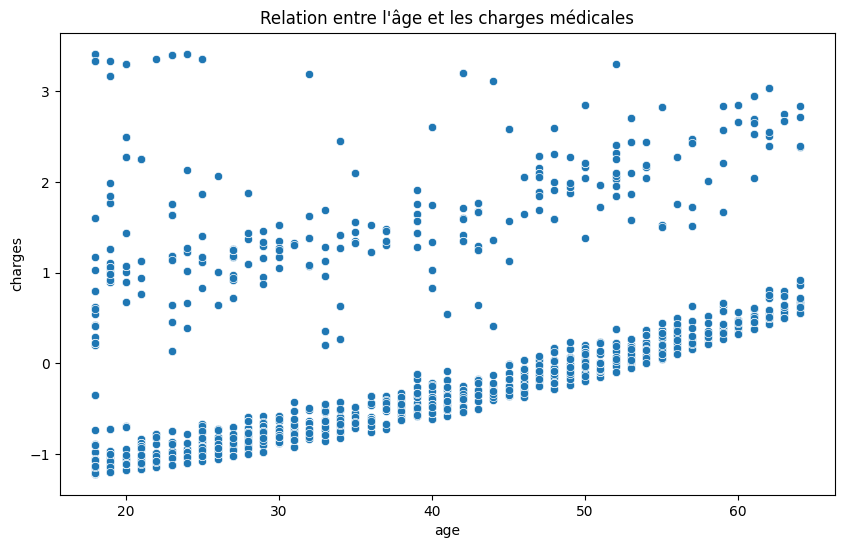

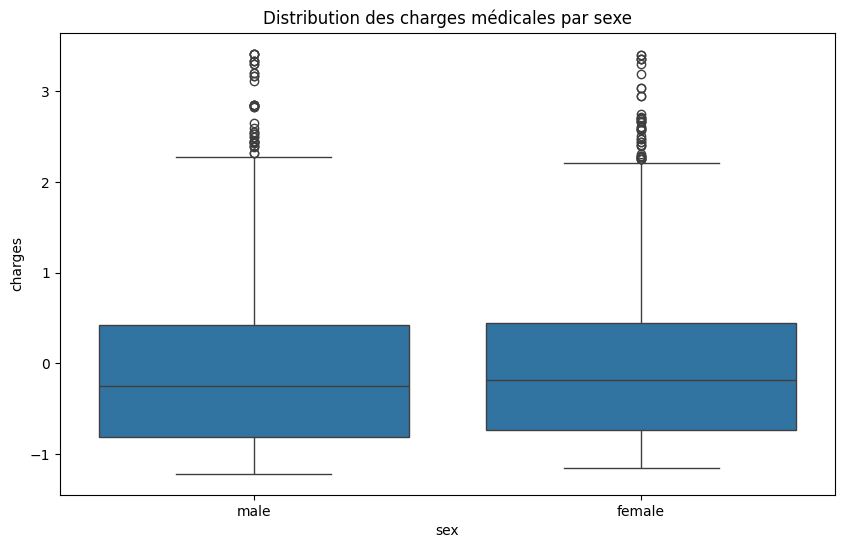

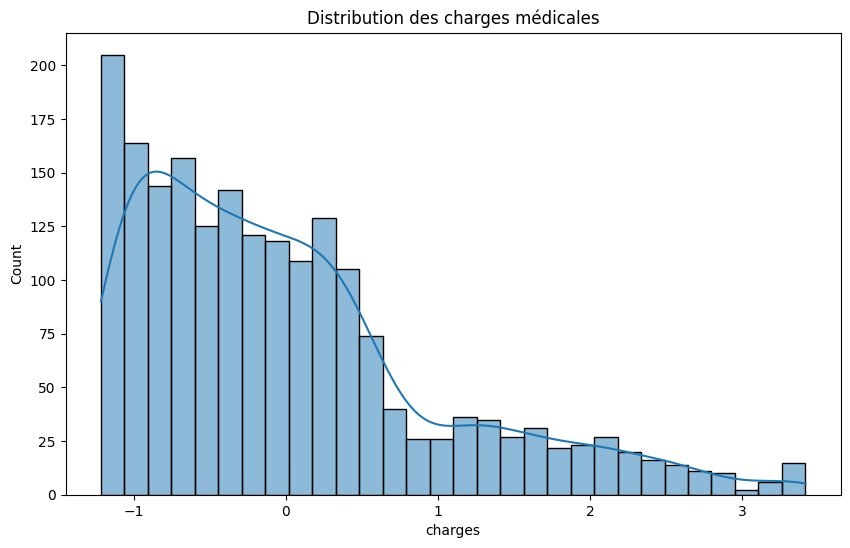

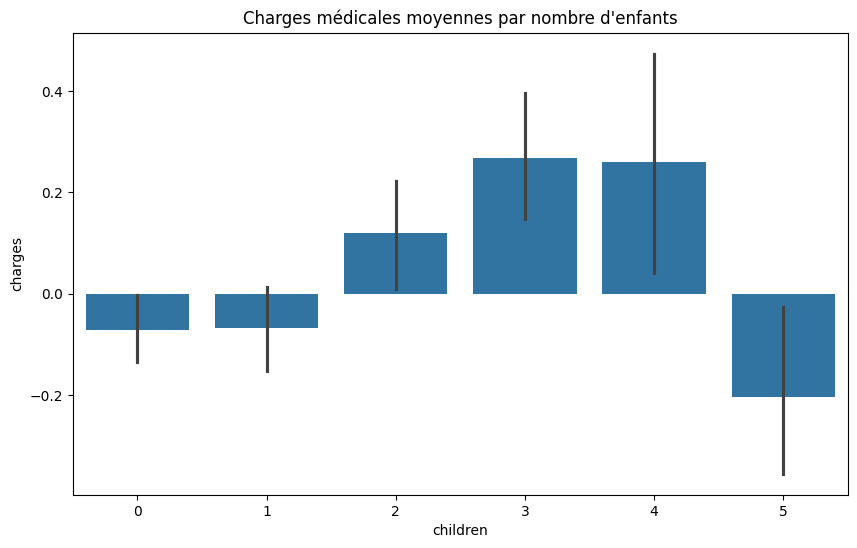

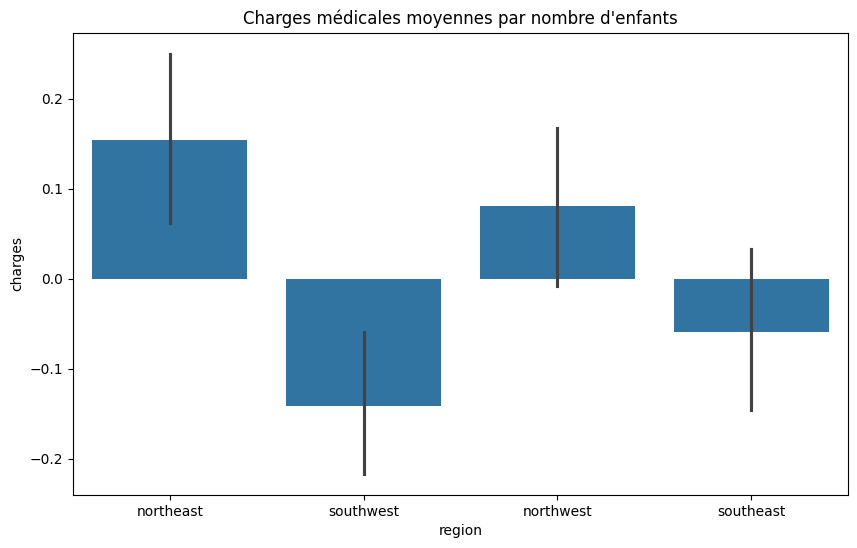

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Graphique de dispersion : Age vs Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=data)
plt.title('Relation entre l\'âge et les charges médicales')
plt.show()

# Boîte à moustaches : Charges médicales par sexe
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Distribution des charges médicales par sexe')
plt.show()

# Histogramme des charges médicales
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], bins=30, kde=True)
plt.title('Distribution des charges médicales')
plt.show()

# Graphique à barres : Charges médicales moyennes par nombre d'enfants
plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='charges', data=data)
plt.title('Charges médicales moyennes par nombre d\'enfants')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=data)
plt.title('Charges médicales moyennes par nombre d\'enfants')
plt.show()




In [7]:
import seaborn as sns


In [8]:
data = data.join(pd.get_dummies(data.sex)).drop(['sex'], axis=1)

In [9]:
data = data.join(pd.get_dummies(data.region)).drop(['region'], axis=1)

In [10]:
data['smoker'] = data['smoker'].replace({'yes': True, 'no': False})

<Axes: >

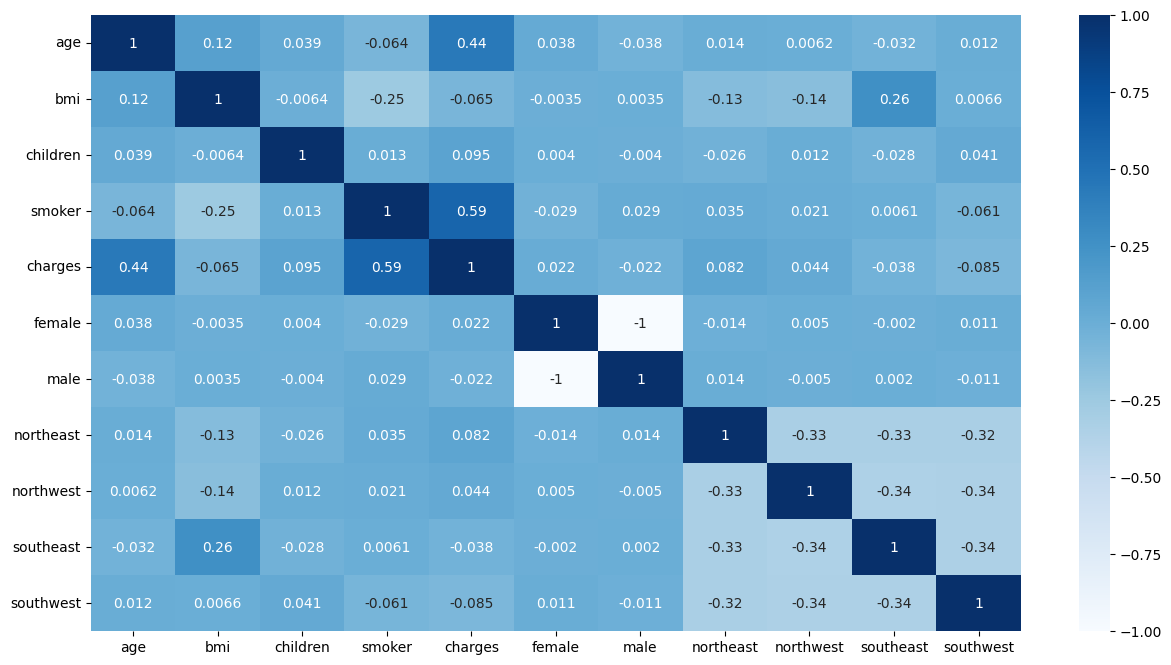

In [11]:
#compare covarience
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap='Blues')

In [12]:
# trying to keep only useful one aka with high covarience but actually i found that when i delete nothing is better
data = data[['smoker', 'age','charges','children','northeast','northwest','southeast','southwest','bmi']]
data

,smoker,age,charges,children,northeast,northwest,southeast,southwest,bmi
2286,False,49,-0.159369,0,True,False,False,False,-1.257293
1869,False,51,0.006916,1,False,False,False,True,1.551550
935,False,59,0.335487,0,False,False,False,True,-0.432914
1449,False,28,-0.795250,1,False,True,False,False,-0.691721
2302,True,43,1.667283,0,False,True,False,False,-0.534618
...,...,...,...,...,...,...,...,...,...
1837,False,30,-0.809405,1,False,True,False,False,-0.990217
1224,False,41,-0.414879,1,True,False,False,False,-1.021638
1263,False,43,-0.347976,1,False,False,False,True,-0.036021
1453,False,40,-0.480363,1,False,True,False,False,-0.628880


In [13]:
from sklearn.linear_model import LinearRegression

x_train, y_train = data.drop(['charges'], axis=1), data['charges']

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [14]:


test_data = test_data.join(pd.get_dummies(test_data.sex)).drop(['sex'], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.region)).drop(['region'], axis=1)
test_data['smoker'] = test_data['smoker'].replace({'yes': True, 'no': False})
test_data = test_data[['smoker', 'age','charges','children','northeast','northwest','southeast','southwest','bmi']]
test_data

x_test, y_test = test_data.drop(['charges'], axis=1), test_data['charges']


In [15]:
reg.score(x_test, y_test)

0.6145351736591486

In [16]:
y_pred = reg.predict(x_test)
y_pred[::10]

array([-0.47564501, -0.48282635,  0.19805095, -0.2298792 , -0.65575538,
       -0.35163269,  0.59887006, -1.13142424,  0.30056758,  0.04953146,
        0.19362629, -0.80222331,  0.87708728,  1.77319033, -0.93866668,
        1.99704582, -0.02957941, -0.34939793,  0.23650625, -0.97208194,
        2.06726497, -0.34594613, -0.10136403, -1.07068895,  0.33850419,
        0.26985444, -0.2398446 ,  2.00338561,  0.41198318,  1.12218777,
       -0.40554509,  0.23710924,  0.31228491, -1.00151183, -0.00850771,
        0.17192723, -0.20786487, -0.81275953, -0.72609038,  0.11046765,
        1.90728427, -1.04798754, -1.02125929,  0.27794713, -0.55105487,
        0.03959338,  1.49812997,  0.16629553, -0.86295607, -0.12415566])

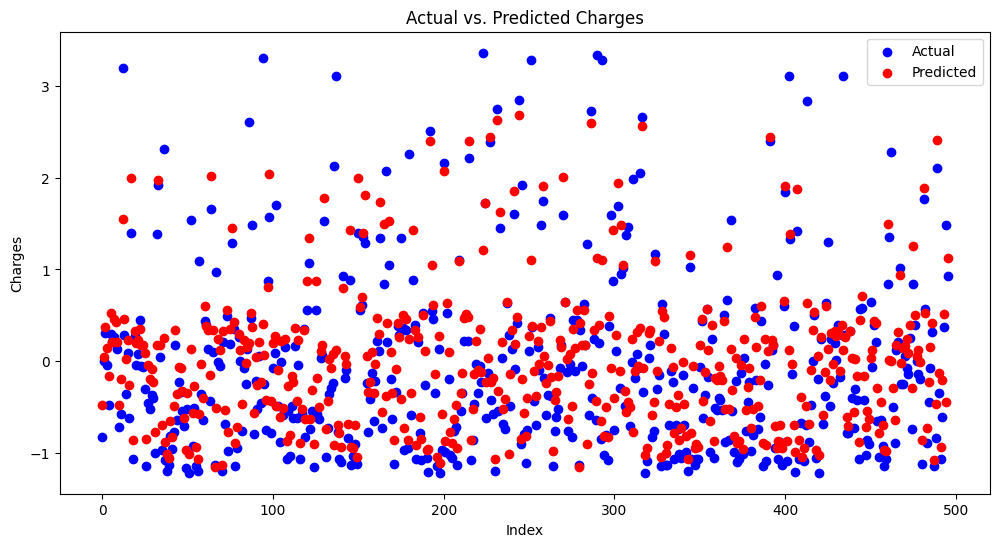

In [17]:
import numpy as np

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(np.arange(len(y_test)), y_pred, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Charges')
plt.title('Actual vs. Predicted Charges')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import r2_score


r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# results are bad so i will try randoforest algorithm

R-squared: 0.6145351736591486


In [19]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [20]:
forest.score(x_test, y_test)

0.8905899703036915

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators" : [3,  10, 30,50,100],
    "max_features" : [2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(forest, param_grid,cv=5,scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8, 10],
                         'n_estimators': [3, 10, 30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [22]:
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(max_features=4)

In [23]:
best_forest.score(x_test,y_test)

0.8982334401414616

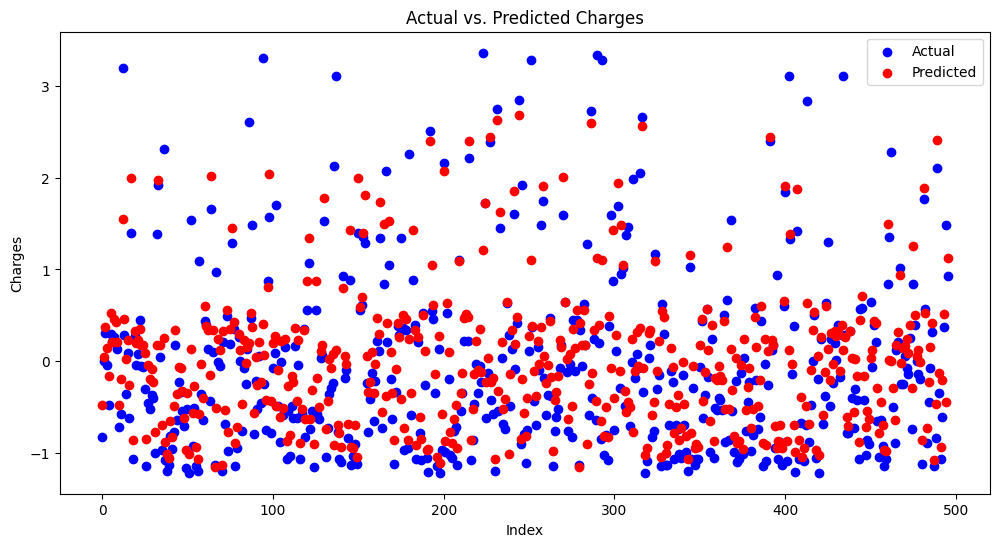

In [24]:
import numpy as np

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(np.arange(len(y_test)), y_pred, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Charges')
plt.title('Actual vs. Predicted Charges')
plt.legend()
plt.show()

In [34]:
import pandas as pd

# Create a DataFrame with the actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
print(df.sample(5))


        Actual  Predicted
2409 -1.133433  -1.054765
2175  0.506369   0.432946
732  -0.781112  -0.707165
1592  0.267012   0.300568
904   0.392827   0.381059
